In [17]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.utils import check_random_state
import itertools


Populating the interactive namespace from numpy and matplotlib


In [ ]:
def make_2DGaussXOR(n_samples):
    n = int(n_samples / 4)
    std = 0.25
    
    c = np.array(list(itertools.product([0.5, -0.5], repeat=2)))
    z = np.full(shape=2, fill_value=n)

    X1,_ = datasets.make_blobs(n_samples=z, n_features=2, centers=c[[0,3], :], cluster_std=std)
    X2,_ = datasets.make_blobs(n_samples=z, n_features=2, centers=c[[1,2], :], cluster_std=std)
    y1 = np.ones(n*2)
    y2 = np.zeros(n*2)

    X = np.concatenate((X1, X2))
    y = np.concatenate((y1, y2))

    return X,y

In [ ]:
X,y = make_2DGaussXOR(1500)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], X[:,1], c=y, edgecolor='none');
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.grid(which='major', axis='both')

In [ ]:
def make_nDGaussXOR(n_samples, n_dimensions):
    f = n_dimensions
    n = int(n_samples / f)
    c = np.array(list(itertools.product([0.5, -0.5], repeat=f)))
    
    for i in range(2**f):
        X1,_ = datasets.make_blobs(n_samples=n, n_features=f, centers=c[i, :].reshape(1, -1), cluster_std=0.25)
    
        d = c[i]
        if len(d[d < 0]) % 2 == 0:
            y1 = np.ones(n)
        else:
            y1 = np.zeros(n)
    
        if i == 0:
            X, y = X1, y1
        else:
            X,y = np.concatenate((X, X1)), np.concatenate((y, y1))
        
    return X,y

In [ ]:
X,y = make_nDGaussXOR(1500, 4)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], X[:,1], c=y, edgecolor='none');
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.grid(which='major', axis='both')

In [ ]:
m = X.T.mean(axis=1) # calculate the mean of each row
m = m[:, np.newaxis] # reshape the mean
M = X.T - m # normalization
C = M.dot(M.T) / (M.shape[1] - 1) # calculate the covariance matrix 

print('\nCovariance Matrix: \n')
print(C)
print('\nMean: \n')
print(m)

## Function Definition according to sklearn API

In [36]:
def make_XOR(n_samples=100, cluster_center=[0,0], cluster_std=0.25, dist_from_center=0.5,
             N_XOR=False, theta_rotation=0, random_state=None):
    """
    Generate 2-dimensional Gaussian XOR distribution.
    (Classic XOR problem but each point is the center of a Gaussian blob distribution)
    
    Parameters
    ----------
    n_samples : int, optional (default=100)
        If int, it is the total number of points equally divided among
        the four clusters.
        
    cluster_center : array of shape [2,], optional (default=[0,0])
        The x1 and x2 coordinates of the center of the four clusters.

    cluster_std : float, optional (default=0.25)
        The standard deviation of the clusters.
    
    dist_from_center : float, optional (default=0.5)
        X value distance of each cluster to the center of the four clusters.
        
    N_XOR : boolean, optional (default=False)
        Change to Gaussian N_XOR distribution (inverts the class labels).
        
    theta_rotation : float, optional (default=0)
        Number of radians to rotate the distribution by. 
    
    random_state : int, RandomState instance, default=None
        Determines random number generation for dataset creation. Pass an int
        for reproducible output across multiple function calls.
      
   
    Returns
    -------
    X : array of shape [n_samples, 2]
        The generated samples.
    y : array of shape [n_samples]
        The integer labels for cluster membership of each sample.
    """
    
    #variable setup
    seed = random_state
    dist = dist_from_center
    std = cluster_std
    n = int(n_samples/4)
    
    cluster_centers = np.array(list(itertools.product([dist, -dist], repeat=2)))
    cluster_centers = cluster_center - cluster_centers
    n_per_cluster = np.full(shape=2, fill_value=n)

    #make blobs
    X1,_ = datasets.make_blobs(n_samples=n_per_cluster, n_features=2, centers=cluster_centers[[0,3], :], 
                               cluster_std=std, random_state=seed)
    X2,_ = datasets.make_blobs(n_samples=n_per_cluster, n_features=2, centers=cluster_centers[[1,2], :], 
                               cluster_std=std, random_state=seed)
    
    #assign classe
    if N_XOR:
        y1, y2 = np.zeros(n*2), np.ones(n*2)
    else:
        y1, y2 = np.ones(n*2), np.zeros(n*2)

    X = np.concatenate((X1, X2))
    y = np.concatenate((y1, y2))

    #rotation
    c, s = np.cos(theta_rotation), np.sin(theta_rotation)
    R = np.array([[c, -s], [s, c]])
    X = (R @ X.T).T
    
    return X,y

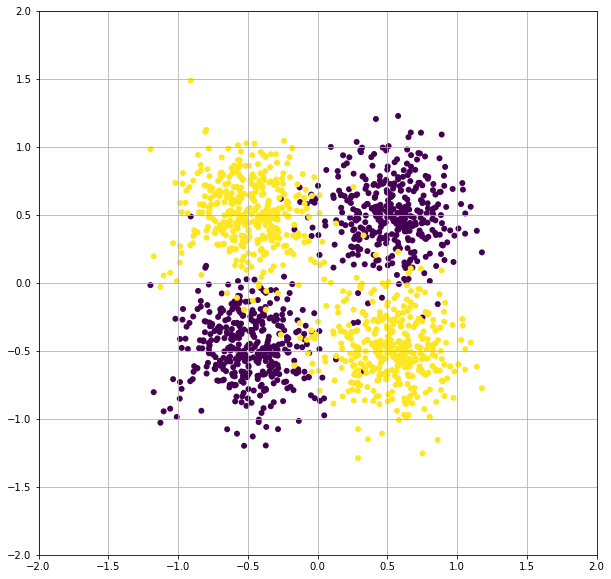

In [37]:
X,y = make_XOR(n_samples=1500, N_XOR=True, random_state=1)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], X[:,1], c=y, edgecolor='none');
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.grid(which='major', axis='both')